## Imports

In [354]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import scipy.io as sio
from numpy.random import permutation

from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score

import random

## Loading Data

In [355]:
def load_USPS(path, sample_per_class):
    data = sio.loadmat(path)
    img = data['data']
    img_data = []
    label = []
    for i in range(img.shape[-1]):
        temp_sample_list = []
        for j in range(img.shape[1]):
            temp = np.reshape(img[:, j, i], [16, 16])
            temp_sample_list.append(temp)

        idx = permutation(len(temp_sample_list))
        idx = idx[:sample_per_class]
        selected_samples = [temp_sample_list[x] for x in idx]
        selected_labels = [(i+1)%10 for _ in idx]
        img_data.extend(selected_samples)
        label.extend(selected_labels)

    img_data = np.array(img_data).astype('float')
    labels = np.array(label)
    return img_data, labels


images, labels = load_USPS("usps_all.mat", 100)
images = np.reshape(images, [images.shape[0], -1])

label 0


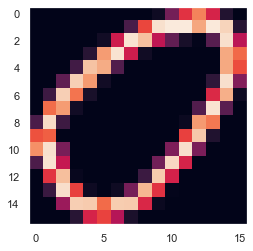

label 0


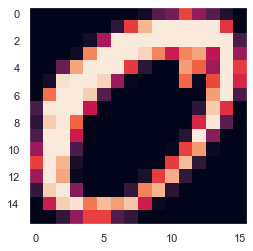

label 0


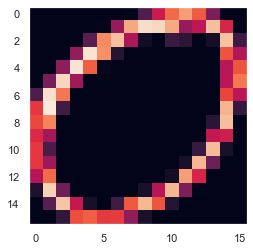

label 0


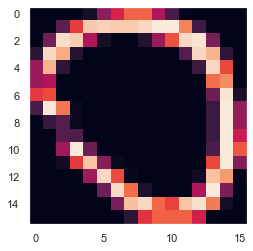

label 0


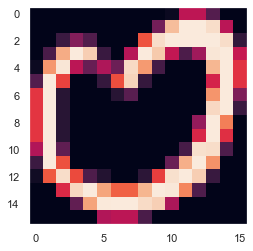

label 0


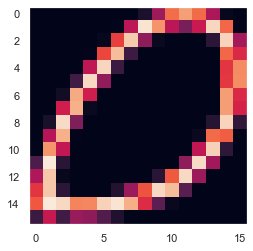

label 0


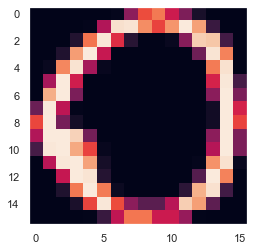

label 0


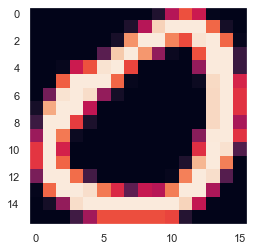

label 0


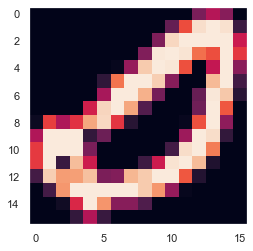

In [356]:
for i in range(-10, -1):
    print("label", labels[i])
    plt.imshow(images[i].reshape(16,16))
    plt.show()

In [357]:
mat = kneighbors_graph(images, 10, mode='distance', include_self=True).toarray()
sum_of_distances = mat.sum()
delta = 1/3 * (sum_of_distances/100)
W=np.exp(np.power(mat, 2)/(2*np.power(delta,2)))
D = np.eye(W.shape[1])*10

In [358]:
L = D-W
L = L.round(5)
L

array([[ 9., -1., -1., ..., -1., -1., -1.],
       [-1.,  9., -1., ..., -1., -1., -1.],
       [-1., -1.,  9., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  9., -1., -1.],
       [-1., -1., -1., ..., -1.,  9., -1.],
       [-1., -1., -1., ..., -1., -1.,  9.]])

In [371]:
for test in [0.3, 0.45, 0.6, 0.9, 0.95, 0.97]:
        len_of_m = int(test * len(labels))
        len_of_not_m = len(labels) - len_of_m

        Y = np.zeros((len_of_m,1))
        not_sampled_Y = np.zeros((len_of_not_m,1))

        sampled_images = np.zeros((len_of_m, 16*16))
        not_sampled_images = np.zeros((len_of_not_m, 16*16))

        indexes = random.sample(range(0, len(labels)), len_of_m)
        not_indexes = []
        for i in range(len(labels)):
                if i not in indexes:
                        not_indexes.append(i)

        S = np.zeros((len(labels), len_of_m))

        for i in range(len_of_m):
                Y[i]  = labels[indexes[i]]
                sampled_images[i] = images[indexes[i]]
                S[indexes[i]][i] = 1

        for i in range(len_of_not_m):
                not_sampled_Y[i]  = labels[not_indexes[i]]
                not_sampled_images[i] = images[not_indexes[i]]
        
        inv_L = np.linalg.inv(L)
        term1 = np.linalg.inv(np.dot(np.dot(S.T, inv_L), S))
        term2 = np.dot(np.dot(inv_L,S),term1)
        y_pred = np.dot(term2, Y)
        y_pred = np.round(np.abs(y_pred), 0).astype(int)

        y_pred_not_sampled = [y_pred[i][0] for i in not_indexes]

        # plt.hist(y_pred, bins=np.arange(y_pred.max()+2))
        # plt.xticks(np.arange(y_pred.max()+2))
        # plt.show()

        # print("y_pred_not_sampled")
        # print(y_pred_not_sampled)
        y_groundtruth = [labels[i] for i in not_indexes]
        # print()
        # print("y_groundtruth")
        # print(y_groundtruth)
        # print()
        # print("y_pred")
        # print([i[0] for i in y_pred])
        # print()
        
        acc = accuracy_score(y_groundtruth, y_pred_not_sampled)
        print(f'{test * 100}% of data (not sampled) | Accuracy: {acc.round(3)}')

        # acc2 = accuracy_score(y_pred, labels)
        # print(f'{test * 100}% of data (all) | Accuracy: {acc2.round(3)}')
        # break

30.0% of data (not sampled) | Accuracy: 0.104
45.0% of data (not sampled) | Accuracy: 0.096
60.0% of data (not sampled) | Accuracy: 0.108
90.0% of data (not sampled) | Accuracy: 0.0
95.0% of data (not sampled) | Accuracy: 0.0
97.0% of data (not sampled) | Accuracy: 0.0


In [360]:
len(indexes)

800

In [361]:
len(set(indexes))

800